In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/train.csv"

In [3]:
test_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/test.csv"

In [4]:
train = pd.read_csv(train_path)

In [5]:
train["SalePrice_ln"] = np.log(train["SalePrice"])

In [6]:
train.drop(["Id","SalePrice"], inplace = True, axis = 1)

In [7]:
test = pd.read_csv(test_path)
test.drop("Id", inplace = True, axis = 1)

In [8]:
#test["SalePrice_ln"] = np.log(test["SalePrice"])

In [9]:
#goals:
##log-transform relevant cts variables (those with skewness greater than .75)
##dummies the unordered
##create ranking functions for the ordered

##fit an elastic net, fit a randomforest, 

In [10]:
train["BsmtQual"].isnull().sum()

37

In [11]:
train_cts = train.loc[:,(train.dtypes != "object")]

In [11]:
test.shape

(1459, 79)

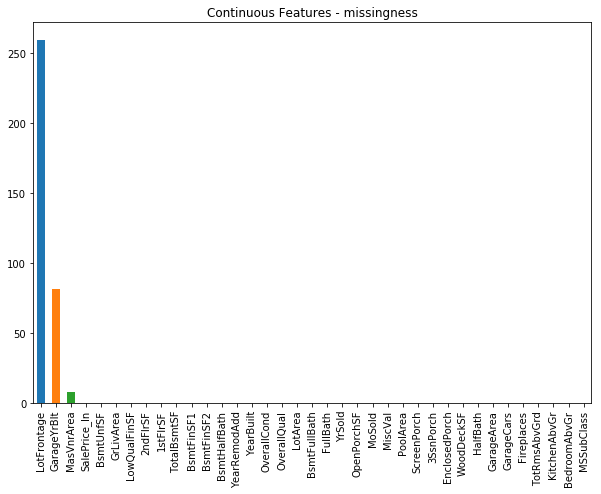

In [12]:
train_cts.isnull().sum().sort_values(ascending = False).plot(kind="bar", figsize = (10,7))
plt.title("Continuous Features - missingness")
plt.show()
#so for CTS lot frontage is most missing (~250)
#garageyrbuilt is second most missing (~100)
#masVnrArea is third (< 20)

In [13]:
#cts -- impute 
#lot frontage
#Garage yr built
#Mas Vnr Area

In [14]:
train_discrete = train.loc[:,(train.dtypes == "object")]

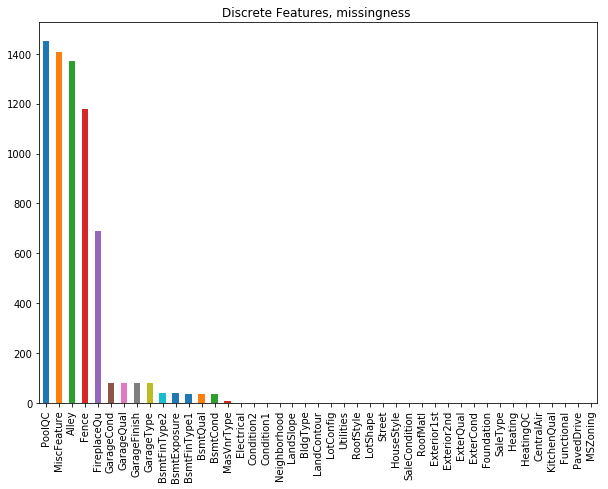

In [15]:
train_discrete.isnull().sum().sort_values(ascending = False).plot(kind="bar", figsize = (10,7))
plt.title("Discrete Features, missingness ")
plt.show()

In [16]:
#set(train["BsmtExposure"])

# ordered (taken care of already)

#garagecondition 
#garageFinish
#garageQuality
#BsmtExposure
#BsmtCond 
#FireplaceQu

## unordered#
#PoolQC? <- not going to use 
#MiscFeature? <- not going to use
#Alley? <- not going to use 
#Fence?
#MasVnrType?
#BsmtFinType2?
#BsmtFinType1?
#garagetype? 


# `Ordinal` Discrete Features 

In [17]:
# "!" means dont include
##ordered -- must use pd.apply()
# OverallQual
# OverallCond
# Condition1 
# Condition2 !
# ExterQual --> "ExteriorQuality"
# ExterCond --> "ExteriorCondition"
# BsmtQual --> "BasementQuality"
# BsmtCond --> "BasementCondition"
# BsmtExposure  --> "BasementExposure"
# HeatingQC --> "HeatingQuality"
# KitchenQual --> "KitchenQuality"
# FireplaceQu --> "FireplaceCount"
# GarageFinish --> "GarageRemodel"
# GarageQual --> "GarageQuality"
# GarageCond --> "GarageCondition"
# PoolQC ! 

In [18]:
set(train["BsmtQual"])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [19]:
train.drop("Condition2", axis=1, inplace = True)
test.drop("Condition2", axis=1, inplace = True)

In [20]:
train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
def basement_quality(row):
    if row["BsmtQual"] == "Ex":
        return 4
    elif row["BsmtQual"] == "Gd":
        return 3
    elif row["BsmtQual"] == "Fa":
        return 1
    elif row["BsmtQual"] == "TA":
        return 2
    else:
        return 0

train["BasementQuality"] = train.apply(basement_quality, axis = 1)
test["BasementQuality"] = test.apply(basement_quality, axis = 1)

In [22]:
train.drop("BsmtQual",axis = 1, inplace = True)
test.drop("BsmtQual",axis = 1, inplace = True)

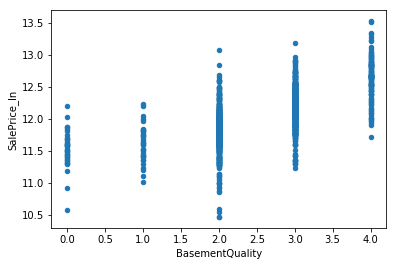

In [23]:
train.plot(kind="scatter",x = "BasementQuality",y = "SalePrice_ln")

In [24]:
train["BasementQuality"].value_counts()

2    649
3    618
4    121
0     37
1     35
Name: BasementQuality, dtype: int64

In [25]:
print("there are",len(train["BasementQuality"]) - train["BasementQuality"].value_counts().sum(),"nan")
print("i.e.",len(train["BasementQuality"]) - train["BasementQuality"].value_counts().sum(),"houses with no basement")

there are 0 nan
i.e. 0 houses with no basement


In [26]:
train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
def basement_condition(row):
    if row["BsmtCond"] == "Ex":
        return 4
    elif row["BsmtCond"] == "Gd":
        return 3
    elif row["BsmtCond"] == "Fa":
        return 1
    elif row["BsmtCond"] == "TA":
        return 2
    else:
        return 0

train["BasementCondition"] = train.apply(basement_condition, axis = 1)
test["BasementCondition"] = test.apply(basement_condition, axis = 1)

In [28]:
train.drop("BsmtCond",axis = 1, inplace = True)
test.drop("BsmtCond",axis = 1, inplace = True)

In [29]:
train["BasementCondition"].value_counts()

2    1311
3      65
1      45
0      39
Name: BasementCondition, dtype: int64

In [30]:
train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [31]:
def basement_exposure(row):
    if row["BsmtExposure"] == "Gd":
        return 4
    elif row["BsmtExposure"] == "Av":
        return 3
    elif row["BsmtExposure"] == "No":
        return 1
    elif row["BsmtExposure"] == "Mn":
        return 2
    else:
        return 0

train["BasementExposure"] = train.apply(basement_exposure, axis = 1)
test["BasementExposure"] = test.apply(basement_exposure, axis = 1)

In [32]:
train.drop("BsmtExposure",axis = 1, inplace = True)
test.drop("BsmtExposure",axis = 1, inplace = True)

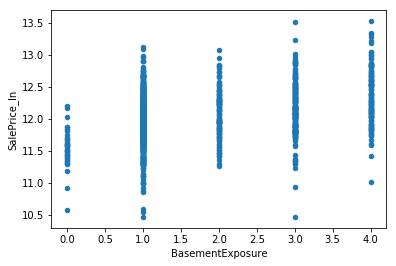

In [33]:
train.plot(kind = "scatter", x = "BasementExposure", y = "SalePrice_ln")

In [34]:
#train["BsmtCond"].value_counts().sum()

In [35]:
# print("same with BsmtCond:",len(train["BsmtCond"]) - train["BsmtCond"].value_counts().sum())

In [36]:
def kitchen_quality(row):
    if row["KitchenQual"] == "Ex":
        return 3
    elif row["KitchenQual"] == "Gd":
        return 2
    elif row["KitchenQual"] == "Fa":
        return 0
    elif row["KitchenQual"] == "TA":
        return 1

train["KitchenQuality"] = train.apply(kitchen_quality, axis = 1)
test["KitchenQuality"] = test.apply(kitchen_quality, axis = 1)

In [37]:
train.drop("KitchenQual",axis = 1, inplace = True)
test.drop("KitchenQual",axis = 1, inplace = True)

In [38]:
train["KitchenQuality"].value_counts()

1    735
2    586
3    100
0     39
Name: KitchenQuality, dtype: int64

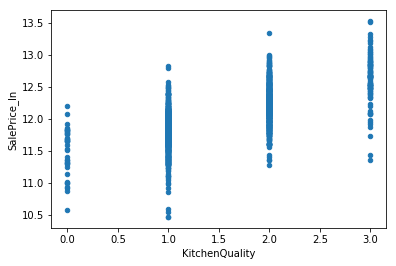

In [39]:
train.plot(kind = "scatter", x = "KitchenQuality", y = "SalePrice_ln")

In [40]:
def heating_quality(row):
    if row["HeatingQC"] == "Ex":
        return 4
    elif row["HeatingQC"] == "Gd":
        return 3
    elif row["HeatingQC"] == "Fa" or row["HeatingQC"] == "Po":
        return 1
    elif row["HeatingQC"] == "TA":
        return 2

train["HeatingQuality"] = train.apply(heating_quality, axis = 1)
test["HeatingQuality"] = test.apply(heating_quality, axis = 1)

In [41]:
train.drop("HeatingQC",axis = 1, inplace = True)
test.drop("HeatingQC",axis = 1, inplace = True)

In [42]:
train["HeatingQuality"].value_counts()

4    741
2    428
3    241
1     50
Name: HeatingQuality, dtype: int64

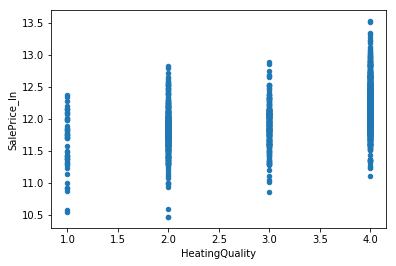

In [43]:
train.plot(kind ="scatter", x="HeatingQuality",y="SalePrice_ln")

In [44]:
def exterior_quality(row):
    if row["ExterQual"] == "Ex":
        return 3
    elif row["ExterQual"] == "Gd":
        return 2
    elif row["ExterQual"] == "Fa":
        return 0
    elif row["ExterQual"] == "TA":
        return 1

train["ExteriorQuality"] = train.apply(exterior_quality, axis = 1)
test["ExteriorQuality"] = test.apply(exterior_quality, axis = 1)

In [45]:
train.drop("ExterQual", axis = 1, inplace = True)
test.drop("ExterQual", axis = 1, inplace = True)

In [46]:
train["ExteriorQuality"].value_counts()

1    906
2    488
3     52
0     14
Name: ExteriorQuality, dtype: int64

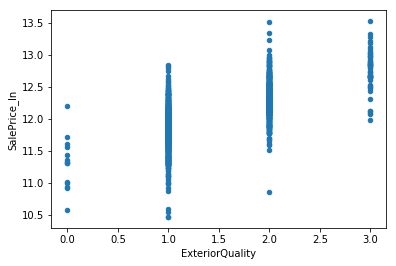

In [47]:
train.plot(kind = "Scatter", x = "ExteriorQuality", y = "SalePrice_ln")
#plt.show()

In [48]:
set(train["ExterCond"])

{'Ex', 'Fa', 'Gd', 'Po', 'TA'}

In [49]:
train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [50]:
def exterior_condition(row):
    if row["ExterCond"] == "Ex" or row["ExterCond"] == "Gd":
        return 2
    elif row["ExterCond"] == "Fa" or row["ExterCond"] == "Po":
        return 0
    elif row["ExterCond"] == "TA":
        return 1

train["ExteriorCondition"] = train.apply(exterior_condition, axis = 1)
test["ExteriorCondition"] = test.apply(exterior_condition, axis = 1)

In [51]:
train.drop("ExterCond",axis = 1, inplace = True)
test.drop("ExterCond",axis = 1, inplace = True)

In [52]:
#train.drop("ExteriorCondition", axis = 1, inplace = True) 

In [53]:
train["ExteriorCondition"].value_counts()

1    1282
2     149
0      29
Name: ExteriorCondition, dtype: int64

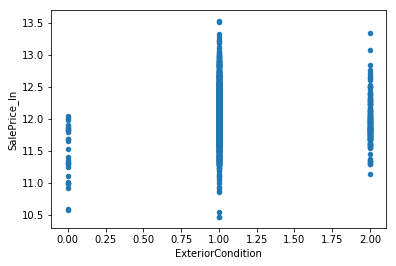

In [54]:
train.plot(kind = "Scatter", x = "ExteriorCondition", y = "SalePrice_ln")
#plt.show()

In [55]:
def fireplace_count(row):
    if row["FireplaceQu"] == "Ex":
        return 5
    elif row["FireplaceQu"] == "Gd":
        return 4
    elif row["FireplaceQu"] == "Fa":
        return 2
    elif row["FireplaceQu"] == "TA":
        return 3
    elif row["FireplaceQu"] == "Po":
        return 1
    else:
        return 0
    
train["FireplaceCount"] = train.apply(fireplace_count, axis = 1)
test["FireplaceCount"] = test.apply(fireplace_count, axis = 1)

In [56]:
train.drop("FireplaceQu",axis = 1, inplace = True)
test.drop("FireplaceQu",axis = 1, inplace = True)

In [57]:
#set(train["FireplaceQu"])

In [58]:
#train["FireplaceQu"].value_counts()

In [59]:
train["FireplaceCount"].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceCount, dtype: int64

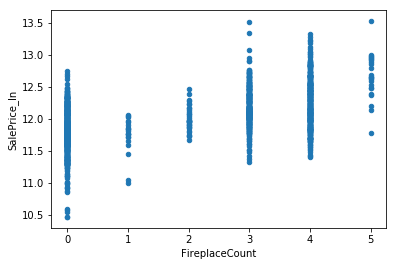

In [60]:
train.plot(kind = "scatter", x = "FireplaceCount", y = "SalePrice_ln")

In [61]:
set(train["GarageFinish"])

{'Fin', 'RFn', 'Unf', nan}

In [62]:
def garage_finish(row):
    if row["GarageFinish"] =="Fin" or row["GarageFinish"] =="RFn":
        return 2
    elif row["GarageFinish"] == "Unf":
        return 1
    else:
        return 0

train["GarageRemodel"] = train.apply(garage_finish, axis = 1)
test["GarageRemodel"] = test.apply(garage_finish, axis = 1)

In [63]:
train.drop("GarageFinish",axis = 1, inplace = True)
test.drop("GarageFinish",axis = 1, inplace = True)

In [64]:
train["GarageRemodel"].value_counts()

2    774
1    605
0     81
Name: GarageRemodel, dtype: int64

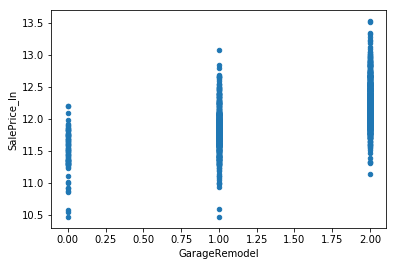

In [65]:
train.plot(kind = "scatter", x = "GarageRemodel", y = "SalePrice_ln")

In [66]:
#set(train["GarageQual"])

In [67]:
#train[["GarageQuality","GarageRemodel"]].corr()

In [68]:
def garage_quality(row):
    if row["GarageQual"] =="Ex": 
        return 5
    elif row["GarageQual"] == "Gd":
        return 4
    elif row["GarageQual"] == "TA":
        return 3
    elif row["GarageQual"] == "Fa":
        return 2
    elif row["GarageQual"] == "Po":
        return 1
    else:
        return 0

train["GarageQuality"] = train.apply(garage_quality, axis = 1)
test["GarageQuality"] = test.apply(garage_quality, axis = 1)

In [69]:
train.drop("GarageQual",axis = 1, inplace = True)
test.drop("GarageQual",axis = 1, inplace = True)

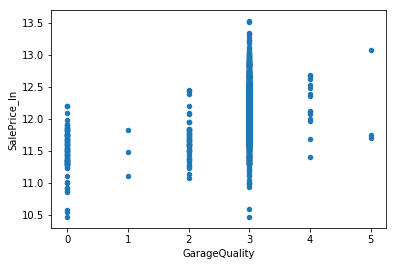

In [70]:
train.plot(kind = "scatter", x = "GarageQuality", y = "SalePrice_ln")

In [71]:
#set(train["GarageCond"])

In [72]:
def garage_condition(row):
    if row["GarageCond"] =="Ex": 
        return 5
    elif row["GarageCond"] == "Gd":
        return 4
    elif row["GarageCond"] == "TA":
        return 3
    elif row["GarageCond"] == "Fa":
        return 2
    elif row["GarageCond"] == "Po":
        return 1
    else:
        return 0

train["GarageCondition"] = train.apply(garage_condition, axis = 1)
test["GarageCondition"] = test.apply(garage_condition, axis = 1)

In [73]:
train.drop("GarageCond",axis = 1, inplace = True)
test.drop("GarageCond",axis = 1, inplace = True)

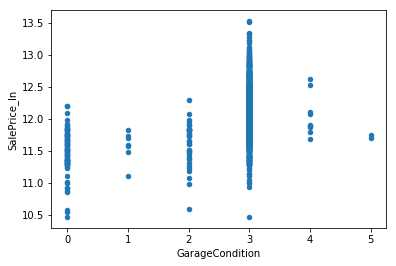

In [74]:
train.plot(kind = "scatter", x = "GarageCondition", y = "SalePrice_ln")

In [75]:
#train["garage_cross"] = train["GarageCondition"] * train["GarageQuality"]

In [76]:
#train[train.GrLivArea < 6000].plot(kind = "scatter", x = "GrLivArea", y = "SalePrice_ln")

In [77]:
#train[["GrLivArea","SalePrice_ln"]][train.GrLivArea < 4500].corr()

In [78]:
#train[train.GrLivArea < 4500].plot(kind = "scatter", x = "GrLivArea", y = "SalePrice_ln")

In [79]:
set(train["PoolQC"])

{'Ex', 'Fa', 'Gd', nan}

In [80]:
train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [81]:
# def pool(row):
#     if row["PoolQC"] == "Ex" or row["PoolQC"] == "Gd" or row["PoolQC"] == "Fa":
#         return 1
#     else:
#         return 0

# train["Pool"] = train.apply(pool, axis = 1)
# test["Pool"] = test.apply(pool, axis = 1)

In [82]:
train.drop("PoolQC",axis = 1, inplace = True)
test.drop("PoolQC",axis = 1, inplace = True)

In [83]:
#train.plot(kind = "scatter", x="Pool", y = "SalePrice_ln")

In [84]:
#train["Pool"].value_counts()

# `Unordered` Discrete Categorical Features

In [85]:
# "!" means dont include
##unordered -- must use pd.get_dummies()
# MSSubClass 
# MSZoning
# LandContour
# LotConfig
# Neighborhood
# LandSlope
# BldgType
# HouseStyle
# RoofStyle
# RoofMatl
# Exterior1st
# Foundation
# BsmtFinType1
# Heating
# CentralAir
# Electrical
# GarageType
# PavedDrive
# Fence
# SaleType
# SaleCondition


# Street ! 
# Alley !
# LotShape !
# Utilities !
# Exterior2nd!
# MasVnrType !
# BsmtFinType2 !
# Functional !
# MiscFeature !

In [86]:
train.drop(["Street","Alley","LotShape",
            "Utilities","Exterior2nd","MasVnrType",
           "BsmtFinType2","Functional","MiscFeature"], axis = 1, inplace = True)
test.drop(["Street","Alley","LotShape",
            "Utilities","Exterior2nd","MasVnrType",
           "BsmtFinType2","Functional","MiscFeature"], axis = 1, inplace = True)

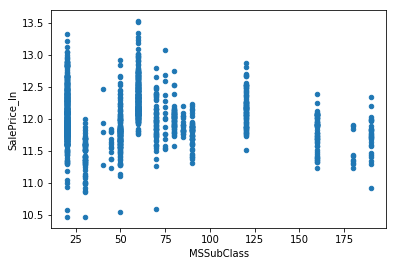

In [87]:
train.plot(kind = "scatter", x = "MSSubClass" , y = "SalePrice_ln")

In [88]:
train["MSSubClass"].astype("str").head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object

In [89]:
train.MSSubClass = train.MSSubClass.astype("category")
test.MSSubClass = test.MSSubClass.astype("category")

In [90]:
transformed_MSSubClass_train = train.groupby("MSSubClass").MSSubClass.transform("count")
transformed_MSSubClass_test = test.groupby("MSSubClass").MSSubClass.transform("count")

In [91]:
train["MSSubClass"] = np.where(transformed_MSSubClass_train < 25, "Other", train["MSSubClass"])
test["MSSubClass"] = np.where(transformed_MSSubClass_test < 25, "Other", test["MSSubClass"])

In [92]:
train["MSSubClass"].value_counts()

20       536
60       299
50       144
120       87
30        69
160       63
Other     62
70        60
80        58
90        52
190       30
Name: MSSubClass, dtype: int64

In [93]:
test.MSSubClass = test.MSSubClass.astype("category")

In [94]:
transformed_MSSubClass = test.groupby("MSSubClass").MSSubClass.transform("count")

In [95]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [96]:
train.MSZoning = train.MSZoning.astype("category")
test.MSZoning = test.MSZoning.astype("category")

In [97]:
transformed_MSZoning_train = train.groupby("MSZoning").MSZoning.transform("count")
transformed_MSZoning_test = test.groupby("MSZoning").MSZoning.transform("count")

In [98]:
train["MSZoning"] = np.where(transformed_MSZoning_train < 25, "Other", train["MSZoning"])
test["MSZoning"] = np.where(transformed_MSZoning_test < 25, "Other", test["MSZoning"])

In [99]:
train["MSZoning"].value_counts()

RL       1151
RM        218
FV         65
Other      26
Name: MSZoning, dtype: int64

In [100]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [101]:
train.LotConfig = train.LotConfig.astype("category")
test.LotConfig = test.LotConfig.astype("category")

In [102]:
transformed_LotConfig_train = train.groupby("LotConfig").LotConfig.transform("count")
transformed_LotConfig_test = test.groupby("LotConfig").LotConfig.transform("count")

In [103]:
train["LotConfig"] = np.where(transformed_LotConfig_train < 50, "Other", train["LotConfig"])
test["LotConfig"] = np.where(transformed_LotConfig_test < 25, "Other", test["LotConfig"])

In [104]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
Other        51
Name: LotConfig, dtype: int64

In [105]:
train["Neighborhood"].value_counts().head()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [106]:
train.Neighborhood = train.Neighborhood.astype("category")
test.Neighborhood = test.Neighborhood.astype("category")

In [107]:
transformed_Neighborhood_train = train.groupby("Neighborhood").Neighborhood.transform("count")
transformed_Neighborhood_test = test.groupby("Neighborhood").Neighborhood.transform("count")

In [108]:
train["Neighborhood"] = np.where(transformed_Neighborhood_train < 25, "Other", train["Neighborhood"])
test["Neighborhood"] = np.where(transformed_Neighborhood_test < 25, "Other", test["Neighborhood"])

In [109]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
Other       72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Name: Neighborhood, dtype: int64

In [110]:
train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [111]:
train.LandSlope = train.LandSlope.astype("category")
test.LandSlope = test.LandSlope.astype("category")

In [112]:
transformed_LandSlope_test = test.groupby("LandSlope").LandSlope.transform("count")
transformed_LandSlope_train = train.groupby("LandSlope").LandSlope.transform("count")

In [113]:
train["LandSlope"] = np.where(transformed_LandSlope_train < 70, "Steep", train["LandSlope"])
test["LandSlope"] = np.where(transformed_LandSlope_test < 25, "Steep", test["LandSlope"])

In [114]:
train["LandSlope"].value_counts()

Gtl      1382
Steep      78
Name: LandSlope, dtype: int64

In [115]:
test["HouseStyle"].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [116]:
train.HouseStyle = train.HouseStyle.astype("category")
test.HouseStyle = test.HouseStyle.astype("category")

In [117]:
transformed_HouseStyle_train = train.groupby("HouseStyle").HouseStyle.transform("count")
transformed_HouseStyle_test = test.groupby("HouseStyle").HouseStyle.transform("count")

In [118]:
train["HouseStyle"] = np.where(transformed_HouseStyle_train < 25, "Other", train["HouseStyle"])
test["HouseStyle"] = np.where(transformed_HouseStyle_test < 25, "Other", test["HouseStyle"])

In [119]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
Other      33
Name: HouseStyle, dtype: int64

In [120]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [121]:
train.RoofStyle = train.RoofStyle.astype("category")
test.RoofStyle = test.RoofStyle.astype("category")

In [122]:
transformed_RoofStyle_train = train.groupby("RoofStyle").RoofStyle.transform("count")
transformed_RoofStyle_test = test.groupby("RoofStyle").RoofStyle.transform("count")

In [123]:
test["RoofStyle"] = np.where((transformed_RoofStyle_test != 13) & (transformed_RoofStyle_test < 25), "Other", test["RoofStyle"])
train["RoofStyle"] = np.where((transformed_RoofStyle_train != 13) & (transformed_RoofStyle_train < 25), "Other", train["RoofStyle"])

In [124]:
train["RoofStyle"].value_counts()

Gable    1141
Hip       286
Other      20
Flat       13
Name: RoofStyle, dtype: int64

In [125]:
train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [126]:
train.RoofMatl = train.RoofMatl.astype("category")
test.RoofMatl = test.RoofMatl.astype("category")

In [127]:
transformed_RoofMatl_train = train.groupby("RoofMatl").RoofMatl.transform("count")
transformed_RoofMatl_test = test.groupby("RoofMatl").RoofMatl.transform("count")

In [128]:
train["RoofMatl"] = np.where(transformed_RoofMatl_train < 25, "Other", train["RoofMatl"])
test["RoofMatl"] = np.where(transformed_RoofMatl_test < 25, "Other", test["RoofMatl"])

In [129]:
train["RoofMatl"].value_counts()

CompShg    1434
Other        26
Name: RoofMatl, dtype: int64

In [130]:
train.Exterior1st = train.Exterior1st.astype("category")
test.Exterior1st = test.Exterior1st.astype("category")

In [131]:
transformed_Exterior1st_train = train.groupby("Exterior1st").Exterior1st.transform("count")
transformed_Exterior1st_test = test.groupby("Exterior1st").Exterior1st.transform("count")

In [132]:
train["Exterior1st"] = np.where(transformed_Exterior1st_train < 25, "Other", train["Exterior1st"])
test["Exterior1st"] = np.where(transformed_Exterior1st_test < 25, "Other", test["Exterior1st"])

In [133]:
train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
Other       27
WdShing     26
Stucco      25
Name: Exterior1st, dtype: int64

In [134]:
train.Foundation = train.Foundation.astype("category")
test.Foundation = test.Foundation.astype("category")

In [135]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [136]:
transformed_Foundation_train = train.groupby("Foundation").Foundation.transform("count")
transformed_Foundation_test = test.groupby("Foundation").Foundation.transform("count")

In [137]:
train["Foundation"] = np.where(transformed_Foundation_train < 25, "Other", train["Foundation"])
test["Foundation"] = np.where(transformed_Foundation_test < 25, "Other", test["Foundation"])

In [138]:
train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Other      33
Name: Foundation, dtype: int64

In [139]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [140]:
train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [141]:
train["BsmtFinType1"].isnull().sum()

37

In [142]:
train["BsmtFinType1"].fillna("None",inplace = True)
test["BsmtFinType1"].fillna("None",inplace = True)

In [143]:
train["BsmtFinType1"].isnull().sum()

0

In [144]:
train["BsmtFinType1"].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [145]:
#train["BsmtFinType2"].value_counts()

In [146]:
train["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [147]:
train.Heating = train.Heating.astype("category")
test.Heating = test.Heating.astype("category")

In [148]:
transformed_Heating_train = train.groupby("Heating").Heating.transform("count")
transformed_Heating_test = test.groupby("Heating").Heating.transform("count")

In [149]:
train["Heating"] = np.where(transformed_Heating_train < 25, "Other", train["Heating"])
test["Heating"] = np.where(transformed_Heating_test < 25, "Other", test["Heating"])

In [150]:
train["Heating"].value_counts()

GasA     1428
Other      32
Name: Heating, dtype: int64

In [151]:
train.Electrical = train.Electrical.astype("category")
test.Electrical = test.Electrical.astype("category")

In [152]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [153]:
transformed_Electrical_train = train.groupby("Electrical").Electrical.transform("count")
transformed_Electrical_test = test.groupby("Electrical").Electrical.transform("count")

In [154]:
train["Electrical"] = np.where(transformed_Electrical_train < 28, "Other", train["Electrical"])
test["Electrical"] = np.where(transformed_Electrical_test < 28, "Other", test["Electrical"])

In [155]:
train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
Other      31
Name: Electrical, dtype: int64

In [156]:
train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [157]:
train["GarageType"].fillna("None",inplace = True)
test["GarageType"].fillna("None",inplace = True)

In [158]:
train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [159]:
train.GarageType = train.GarageType.astype("category")
test.GarageType = test.GarageType.astype("category")

In [160]:
transformed_GarageType_train = train.groupby("GarageType").GarageType.transform("count")
transformed_GarageType_test = test.groupby("GarageType").GarageType.transform("count")

In [161]:
train["GarageType"] = np.where(transformed_GarageType_train < 25, "Other", train["GarageType"])
test["GarageType"] = np.where(transformed_GarageType_test < 25, "Other", test["GarageType"])

In [162]:
#train.GarageType.value_counts()

In [163]:
#train["PavedDrive"].value_counts()

In [164]:
train["Fence"].fillna("None",inplace = True)
test["Fence"].fillna("None",inplace = True)

In [165]:
train["Fence"].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [166]:
train.SaleType = train.SaleType.astype("category")
test.SaleType = test.SaleType.astype("category")

In [167]:
transformed_SaleType_train = train.groupby("SaleType").SaleType.transform("count")
transformed_SaleType_test = test.groupby("SaleType").SaleType.transform("count")

In [168]:
train["SaleType"] = np.where(transformed_SaleType_train < 25, "Other", train["SaleType"])
test["SaleType"] = np.where(transformed_SaleType_test < 25, "Other", test["SaleType"])

In [169]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
Other      28
Name: SaleType, dtype: int64

In [170]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [171]:
train.SaleCondition = train.SaleCondition.astype("category")
test.SaleCondition = test.SaleCondition.astype("category")

In [172]:
transformed_SaleCondition_train = train.groupby("SaleCondition").SaleCondition.transform("count")
transformed_SaleCondition_test = test.groupby("SaleCondition").SaleCondition.transform("count")

In [173]:
train["SaleCondition"] = np.where(transformed_SaleCondition_train < 25, "Other", train["SaleCondition"])
test["SaleCondition"] = np.where(transformed_SaleCondition_test < 25, "Other", test["SaleCondition"])

In [174]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Other        36
Name: SaleCondition, dtype: int64

# `CTS` Features

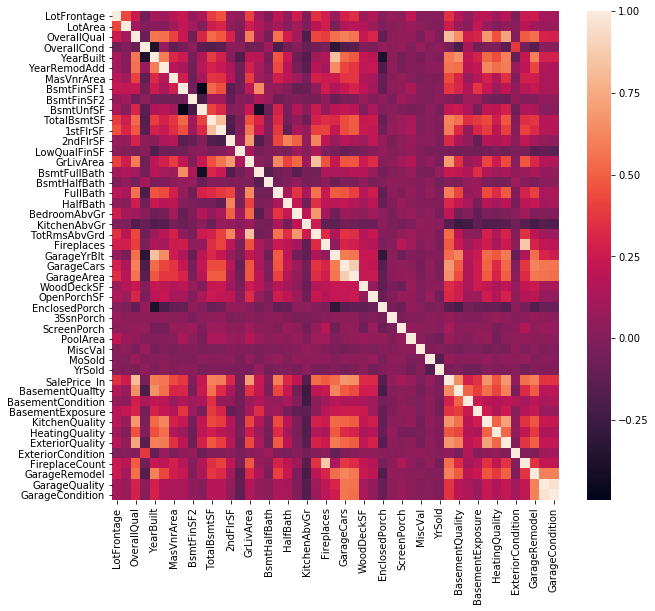

In [175]:
import seaborn as sns
plt.figure(figsize = (10,9))
sns.heatmap(train.loc[:, (train.columns != "Id") & (train.dtypes != "object")].corr())
plt.show()

In [176]:
#first do feature engineering
#then do the skew fixing

# ##CTS 
#ID !
# SalePrice! <- response

# LotFrontage  #<-259 missing (impute?)
# LotArea **

# YearBuilt **
# GarageYrBlt

# YearRemodAdd
# MasVnrArea

# BsmtFinSF1
# BsmtFinSF2
# BsmtUnfSF 
#TODO: <- make a categorical feature if BsmtUnfSF > 0, basement is unfinished
# TotalBsmtSF **


# 1stFlrSF
# 2ndFlrSF **
# LowQualFinSF
# GrLivArea **
# GarageCars
# GarageArea **
# ##TODO: new feature, total_sqft = GrLivArea + TotalBsmtSf + GarageArea

# BsmtFullBath
# BsmtHalfBath
# FullBath
# HalfBath
# ##TODO: new feature, total_bath = HalfBath + FullBath + BsmtHalfBath + BsmtFullBath

# TotRmsAbvGrd
# Fireplaces ** 

# WoodDeckSF
# OpenPorchSF
# EnclosedPorch
# 3SsnPorch
# ScreenPorch
# PoolArea **
# MiscVal
# MoSold
# YrSold

# KitchenAbvGr
# BedroomAbvGr



#a)impute - note:: that if you impute by median/mode of a column in the training set
        # you use those same values for the imputation in the test set
    
    ###lot frontage? <-impute by median
    ###Garage yr built? <-impute by mode
    ###Mas Vnr Area? 

#b)remove outliers 

#c)log transform those with skew > 0.75

#d) standardize

In [177]:
train["LotFrontage"].median()

69.0

In [178]:
train["LotFrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

### Impute missing values

In [179]:
empty_LotFrontage = []
LotFrontage_median = train["LotFrontage"].median()

for items in list(train["LotFrontage"]):
    if "." not in str(items):
        empty_LotFrontage.append(LotFrontage_median)
    else:
        empty_LotFrontage.append(items)
        
train["LotFrontage"] = empty_LotFrontage

In [180]:
empty_LotFrontage = []
LotFrontage_median = train["LotFrontage"].median()

for items in list(test["LotFrontage"]):
    if "." not in str(items):
        empty_LotFrontage.append(LotFrontage_median)
    else:
        empty_LotFrontage.append(items)
        
test["LotFrontage"] = empty_LotFrontage

In [181]:
empty_GarageYrBlt = []
GarageYrBlt_mode = train["GarageYrBlt"].mode()[0]

for items in list(train["GarageYrBlt"]):
    if "." not in str(items):
        empty_GarageYrBlt.append(GarageYrBlt_mode)
    else:
        empty_GarageYrBlt.append(items)
        
train["GarageYrBlt"] = empty_GarageYrBlt

In [182]:
empty_GarageYrBlt = []
GarageYrBlt_mode = train["GarageYrBlt"].mode()[0]

for items in list(test["GarageYrBlt"]):
    if "." not in str(items):
        empty_GarageYrBlt.append(GarageYrBlt_mode)
    else:
        empty_GarageYrBlt.append(items)
        
test["GarageYrBlt"] = empty_GarageYrBlt

In [183]:
empty_MasVnrArea = []
MasVnrArea_mode = train["MasVnrArea"].mode()[0]

for items in list(train["MasVnrArea"]):
    if "." not in str(items):
        empty_MasVnrArea.append(MasVnrArea_mode)
    else:
        empty_MasVnrArea.append(items)
        
train["MasVnrArea"] = empty_MasVnrArea

In [184]:
empty_MasVnrArea = []
MasVnrArea_mode = train["MasVnrArea"].mode()[0]

for items in list(test["MasVnrArea"]):
    if "." not in str(items):
        empty_MasVnrArea.append(MasVnrArea_mode)
    else:
        empty_MasVnrArea.append(items)
        
test["MasVnrArea"] = empty_MasVnrArea

### remove outliers

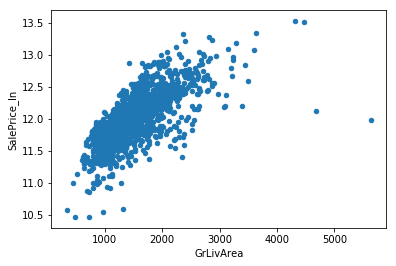

In [185]:
train.plot(kind = "scatter", x ="GrLivArea", y = "SalePrice_ln")

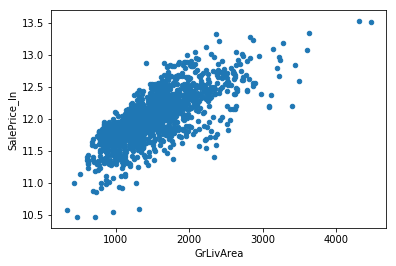

In [186]:
train[train.GrLivArea < 4500].plot(kind = "scatter", x ="GrLivArea", y = "SalePrice_ln")

In [187]:
train.shape

(1460, 69)

In [188]:
train = train[train.GrLivArea < 4500]

In [189]:
train.shape #note:: we've removed the two outliers 

(1458, 69)

In [190]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,BasementCondition,BasementExposure,KitchenQuality,HeatingQuality,ExteriorQuality,ExteriorCondition,FireplaceCount,GarageRemodel,GarageQuality,GarageCondition
0,60,RL,65.0,8450,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,2,1,2,4,2,1,0,2,3,3
1,20,RL,80.0,9600,Lvl,Other,Gtl,Other,Feedr,1Fam,...,2,4,1,4,1,1,3,2,3,3
2,60,RL,68.0,11250,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,2,2,2,4,2,1,3,2,3,3
3,70,RL,60.0,9550,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,3,1,2,3,1,1,4,1,3,3
4,60,RL,84.0,14260,Lvl,Other,Gtl,NoRidge,Norm,1Fam,...,2,3,2,4,2,1,3,2,3,3


In [191]:
train.loc[:, train.dtypes != "object"].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_ln', 'BasementQuality',
       'BasementCondition', 'BasementExposure', 'KitchenQuality',
       'HeatingQuality', 'ExteriorQuality', 'ExteriorCondition',
       'FireplaceCount', 'GarageRemodel', 'GarageQuality', 'GarageCondition'],
      dtype='object')

In [192]:
train['ExteriorQuality'].skew()

0.8200467622253172

In [193]:
discrete_ordered = ["ExteriorQuality",
"ExteriorCondition",
"BasementQuality",
"BasementCondition",
"BasementExposure",
"HeatingQuality",
"KitchenQuality",
"FireplaceCount",
"GarageRemodel",
"GarageQuality",
"GarageCondition",
"OverallQual",
"OverallCond",
"Condition1"]

In [194]:
cts_columns = list(set(train.loc[:, train.dtypes != "object"].columns) - set(discrete_ordered))

In [195]:
train[cts_columns].columns.tolist()

['BedroomAbvGr',
 'LowQualFinSF',
 'EnclosedPorch',
 'BsmtFinSF1',
 'BsmtFullBath',
 'YearRemodAdd',
 '3SsnPorch',
 'MasVnrArea',
 '1stFlrSF',
 'OpenPorchSF',
 'GrLivArea',
 'LotFrontage',
 'TotRmsAbvGrd',
 'GarageArea',
 'SalePrice_ln',
 'GarageCars',
 'TotalBsmtSF',
 'YrSold',
 'Fireplaces',
 'FullBath',
 'GarageYrBlt',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenAbvGr',
 'WoodDeckSF',
 'MiscVal',
 '2ndFlrSF',
 'YearBuilt',
 'MoSold',
 'LotArea',
 'PoolArea',
 'ScreenPorch',
 'BsmtHalfBath',
 'HalfBath']

## Transform skewed numeric features

In [196]:
skew_dict = {}

for items in train[cts_columns].columns.tolist():
    skew_dict[items] = train[items].skew()
    

In [197]:
for features in skew_dict.keys():
    if np.abs(skew_dict[features]) > 0.75:
        train[features+"_ln"] = np.log(1+train[features])
        train.drop(features, axis = 1, inplace = True)

## get dummies

In [200]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [201]:
train.shape

(1458, 167)

In [218]:
test.shape

(1459, 167)

## standardize

In [210]:
train_std = (train - train.mean())/train.std()

In [211]:
test_std = (test - train.mean())/train.std()

In [212]:
#train_std.loc[:,train_cts.columns.tolist()]

In [215]:
train_std["LotFrontage_ln"].head()

0   -0.074756
1    0.582592
2    0.067925
3   -0.327627
4    0.737311
Name: LotFrontage_ln, dtype: float64